<a href="https://colab.research.google.com/github/WidyaIn/PCVK_Semester5/blob/main/Week7_WIDYA_INDAH_PUSPITA_SARI_modul7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : WIDYA INDAH PUSPITA SARI

NIM : 2141720034

KELAS : TI-3A

In [1]:
#Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Import Library yang Digunakan pada Praktikum 7

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
#Buatlah fungsi konvolusi.
#Fungsi konvolusi yang dibuat memiliki parameter berupa: citra masukan,kernel berupa matriks untuk memfilter citra, nilai stride / besarnya pergeseran untuk setiap konvolusi, nilai pad yang akan ditambakan pada citra

def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [4]:
#img_m berisi citra asli dalam format BGR.
img_m = cv.imread('/content/drive/MyDrive/Images/female.tiff')
#img_s berisi citra asli yang telah diubah ukuran (skala setengah).
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
#img_gray berisi citra asli yang telah diubah menjadi citra grayscale.
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

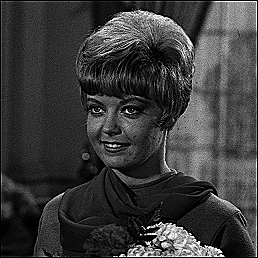

In [5]:
# SHARPEN

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
#Digunakan untuk menampilkan hasil dari operasi konvolusi menggunakan kernel sharpen pada citra grayscale img_gray.
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

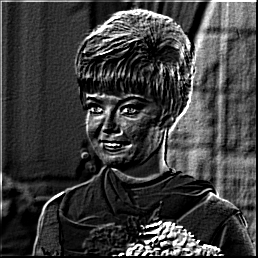

In [6]:
# EMBOS

kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

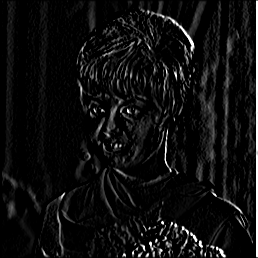

In [7]:
# Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

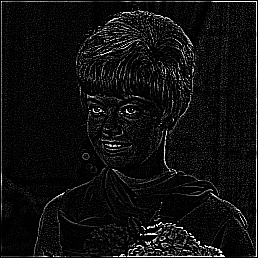

In [8]:
# Canny edge Detection

kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

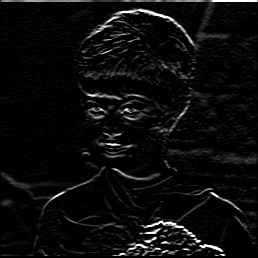

In [9]:
#Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                           [0,0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

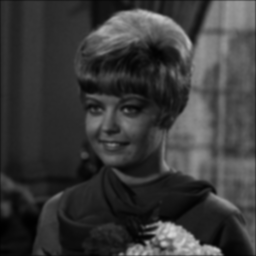

In [10]:
#5x5 Gaussian Blur
kernel_size = 5

sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

border_kernel = (1/256) * np.array([[1, 4, 6, 4, 1],
                                    [4, 16, 24, 16, 4],
                                    [6, 24, 36, 24, 6],
                                    [4, 16, 24, 16, 4],
                                    [1, 4, 6, 4, 1]])


cv2_imshow(convolution2d(img_gray,border_kernel,1,2))

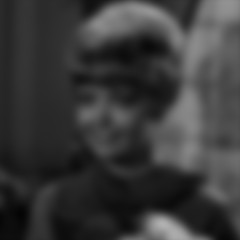

In [11]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# TUGAS

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

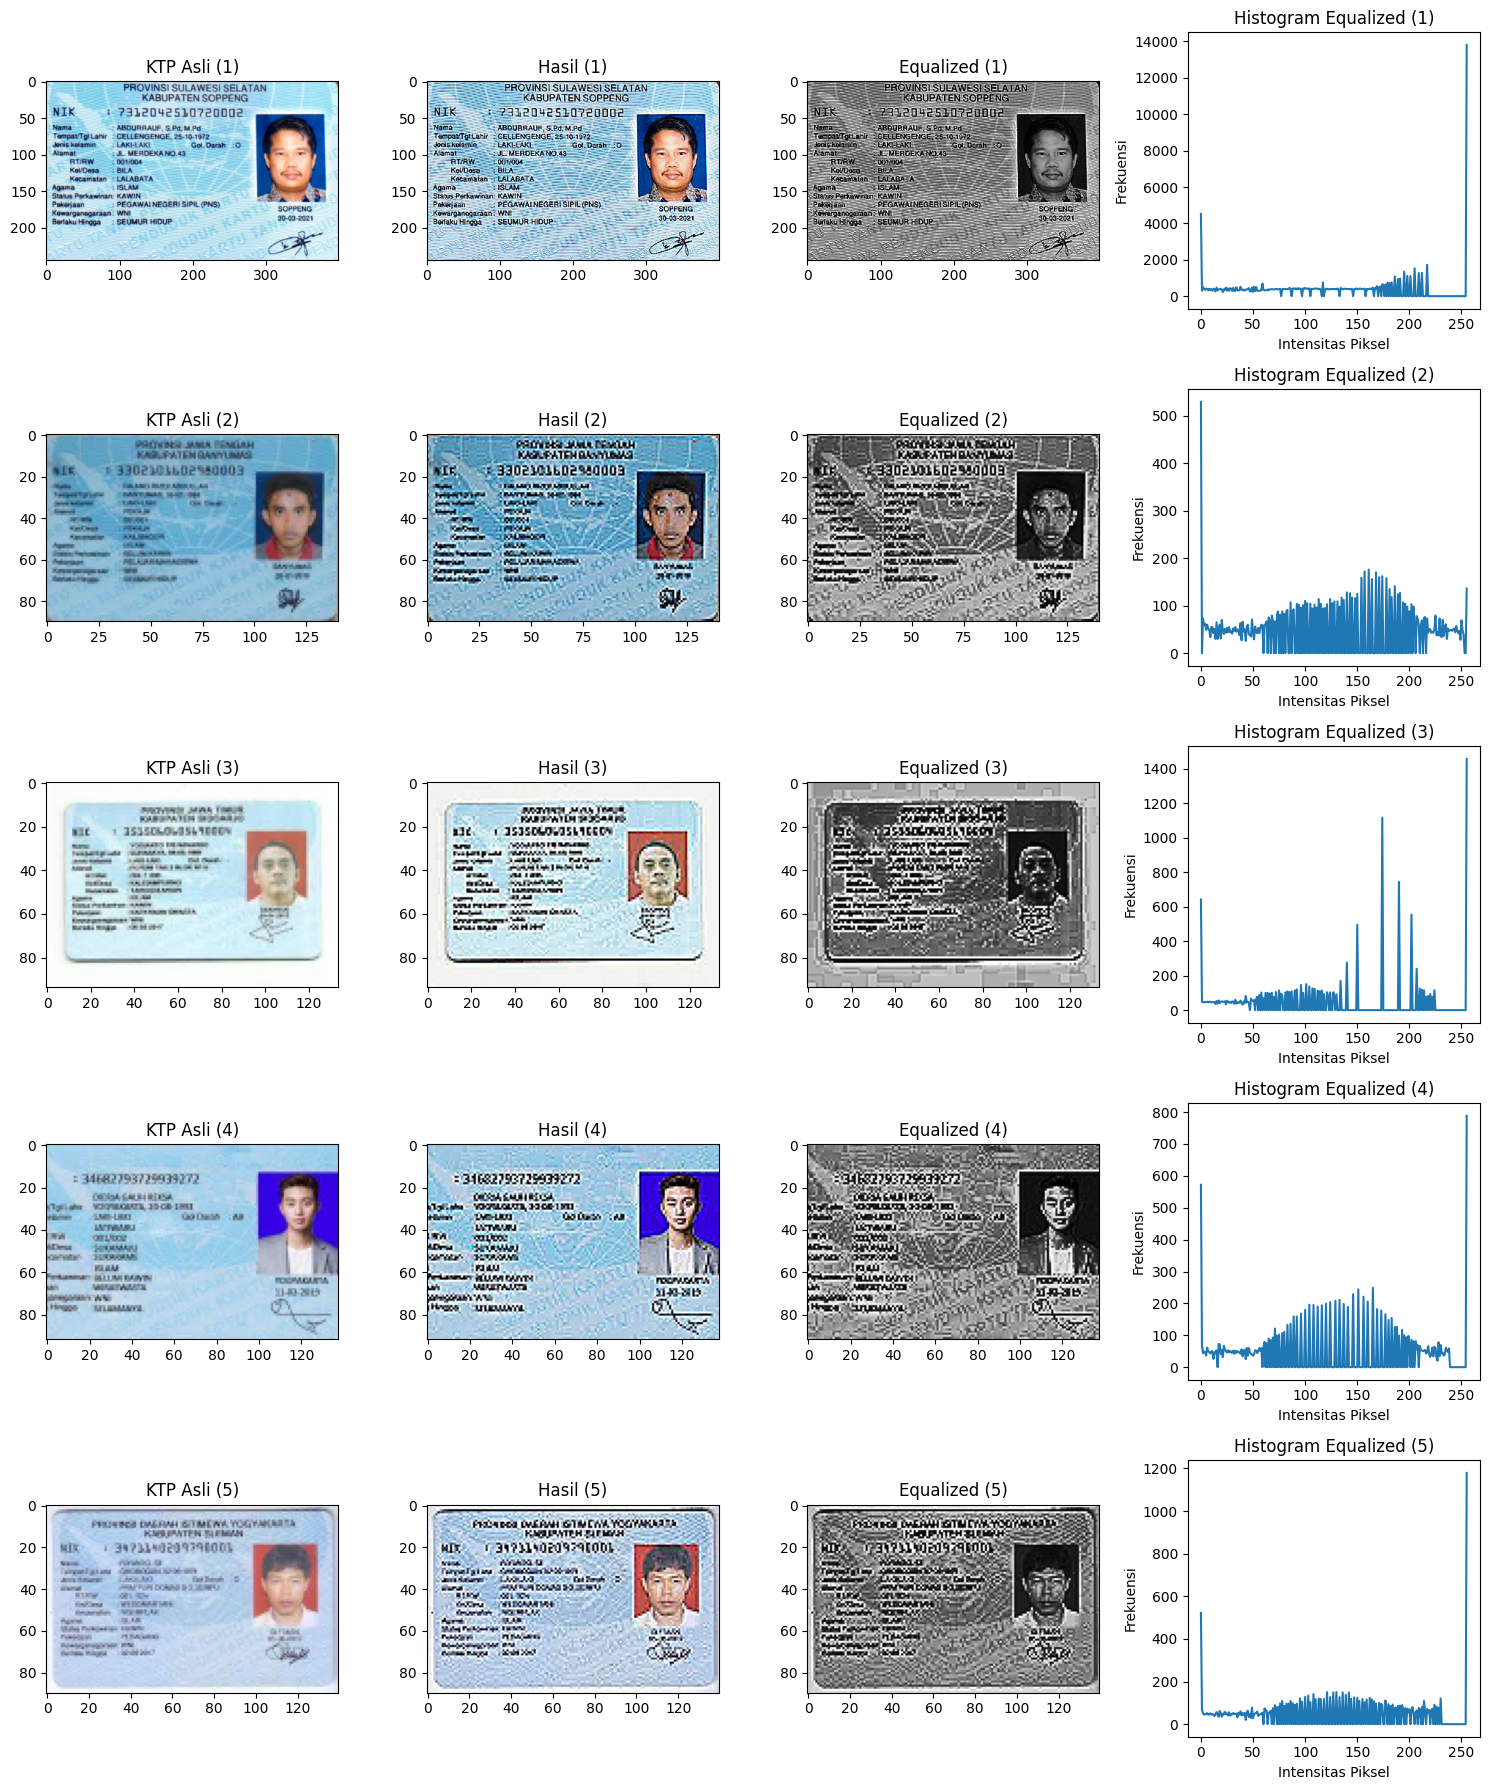

In [19]:
import os

# Fungsi untuk menyesuaikan kecerahan gambar menggunakan model warna HSV
def adjust_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Mengatur path folder gambar KTP
folder_path = '/content/drive/MyDrive/Images/ktp'

# Mendapatkan daftar file gambar dalam folder dengan ekstensi yang sesuai
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Mengatur tampilan grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv.imread(ktp_path)

    # Mengubah ukuran gambar KTP menjadi setengah ukuran aslinya
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Menerapkan penyesuaian kecerahan
    brightness_adjusted = adjust_brightness(ktp_image_resized, -10)

    # Menerapkan filter sharpen
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)

    # Melakukan equalisasi histogram
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)
    equalized = cv.equalizeHist(sharpened_gray)
    equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)

    # Menampilkan gambar asli dengan label
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Asli ({i+1})')

    # Menampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil ({i+1})')

    # Menampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized ({i+1})')

    # Menghitung histogram dari gambar hasil equalisasi
    hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

    # Menampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized ({i+1})')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Menampilkan hasil keseluruhan
plt.tight_layout()
plt.show()